# Polynomial Regression of Blood Glucose Level

Data downloaded from Kaggle at https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Importing Packages

In [1]:
##Import packages

#Data Processing
import pandas as pd
import numpy as np

#Finding the data on our system
import pathlib

#Linear regression
from sklearn import linear_model

#Extra SciKit-Learn functions to create a polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#Metrics to evaluate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#Plotting library
import matplotlib.pyplot as plt

## Importing Data

In [2]:
##Import data from another directory

#Find the file from a local directiory
p = str(pathlib.Path().resolve()).replace("\\Notebooks\\SciKit-Learn Regression", "")
p += ("\\Data\\Raw\\Pima_Indians.csv")
p = pathlib.Path(p).resolve()

#Read into a pandas dataframe
df = pd.read_csv(p)

#Preview the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Removing Rows for Test Data

A vital part of machine learning is being able to test with data that the model is not trained on. This means that we can test the generalisability of our regression with this data. We use SciKit-Learn's train_test_split in order to take 20% of the data at random to be test data.

We also rename the training portions of the data accordingly.

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(["Glucose"], axis=1)
y = df["Glucose"]

training_x, test_x, training_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

## Testing for Multicollinearity

For this dataset, we did this in the previous example (Linear regression), and found that there were no variables above our threshold for removal, so we do not need to do this again.

## Creating Pipeline

As a polynomial regression requires the applying of two functions to our data (PolynomialFeatures to transform it, and Linear regression to fit the weights), we can put these together into a pipeline, which applies both of these to any data added.

In [4]:
#Create function to define model

def PolynomialRegression(degree = 2, interaction_only = False):
    """
    This function returns a model with the desired degree, of the following pipeline
    
    PolynomialFeatures(degree) --> LinearRegression
    
    The resulting model can then be applied to the data, to fit a polynomial regression
    """
    
    #Define pipeline, first applying PolynomialFeatures, then LinearRegression
    model = Pipeline([('PolynomialFeatures', PolynomialFeatures(degree=degree)), 
                      ('LinearRegression', linear_model.LinearRegression())])
    
    return model

## Fitting an Extremely Wiggly Line

Something we can do next is to fit a line to our data, with a very high degree of 10. However, this generally isn't the best idea, as demonstrated by the Mean Squared Error (MSE) of this method.

In [5]:
#Linear Regression Object
wiggly_reg = PolynomialRegression(degree=10)

#Fit the linear regression model with our training data
wiggly_reg.fit(training_x, training_y)

Pipeline(steps=[('PolynomialFeatures', PolynomialFeatures(degree=10)),
                ('LinearRegression', LinearRegression())])

In [6]:
##Test the MSE

#Predict values using the regression model 

y_pred = wiggly_reg.predict(training_x)
y_test_pred = wiggly_reg.predict(test_x)

#Find the MSe
print("Training Mean Squared Error: ", mean_squared_error(training_y, y_pred))
print("Test Mean Squared Error: ", mean_squared_error(test_y, y_test_pred))

Training Mean Squared Error:  65.15684745948603
Test Mean Squared Error:  978929490239911.5


As you can see above, the training MSE is extremely good, the error is really small compared to the value of the average point. However, the test MSE is insanely large. What happened?

What we just experienced was overfitting. Although we can make a very accurate line for our training data, such that the line predicts all of the given points well, we can't make it wiggle correctly for the test data, as we can't see it during training. This means that our test data isn't fit at all well, and the model has no generalisability to new points.

We need to be careful of overfitting when training a model, because although this is an extreme example, it can be more subtle. To avoid this, don't assign very high degrees to your polynomial regressions, and check your fit metrics. A key indicator of overfitting is when your model performs significantly worse on your test data than your training data.

## Training Regression Model

Next, we use the data to train a more sensible polynomial regression model, with degree=2

In [7]:
#Linear Regression Object
reg = PolynomialRegression(degree=2)

#Fit the linear regression model with our training data
reg.fit(training_x, training_y)

Pipeline(steps=[('PolynomialFeatures', PolynomialFeatures()),
                ('LinearRegression', LinearRegression())])

## Evalutating Fit of Model

To evaluate the fit of the model, we compare predicted values using the model to the true values observed. The test values are an important indicator, as we can see if our model generalises to more data points from the same set, without having to be trained on these.

This is done using `model.predict(true_value, predicted_value)`

### Mean Squared Error

One easy way to evaluate the fit of our model is to look at the Mean Squared Error (MSE) of our model. This can be done for both the training and test data sets.

The error here is quite large compared to the value of the glucose. This generally indicates that our predictions still won't be amazing, although depending on the difficulty of prediction, this level of accuracy could be an achievement in itself. Remember that metric values will depend on the exact problem that you are tackling.

In [8]:
#Predict values using the regression model 

y_pred = reg.predict(training_x)
y_test_pred = reg.predict(test_x)

In [9]:
print("Training Mean Squared Error: ", mean_squared_error(training_y, y_pred))
print("Test Mean Squared Error: ", mean_squared_error(test_y, y_test_pred))

Training Mean Squared Error:  601.9556131001212
Test Mean Squared Error:  741.8029012657818


### Explained Variance Score

The Explained Variance Score gives a measure of how much of the variance in the dependent variable can be explained by variance in the indepenent variables. A value of 1 would mean that all of the variance can be explained, and can mean a perfect correlation. This is similar in concept to an r^2 score, but the calculation is slightly different - if the mean of the error terms is 0, then the explained variance is the same as r^2 (Dean, 2021).

As can be seen here, this is 0.40 for the training data, and 0.32 for the test data, meaning that only a small amount of the variation in glucose levels can be predicted by our independent variables. This makes sense, as although diabetes status may have an effect, it is likely that the time since the patient last ate will have a much more significant effect on glucose levels. These are slightly different from our linear values, with a better performance on the training data, and a worse on the test data. The better performance on the test data for the linear model means that the linear model is likely better.

Unfortunately, this value is just hard to predict from our independent variables, although estimates can be gathered.

In [10]:
print("Training Explained Variance :", explained_variance_score(training_y, y_pred))
print("Test Explained Variance :", explained_variance_score(test_y, y_test_pred))

Training Explained Variance : 0.4041286112837972
Test Explained Variance : 0.3220331751778678


### Visualising Regression on a Graph

We can also attempt to visualise the regression, by plotting the curve. This can be done with mean values of other variables kept constant, as we vary one, and see the impact upon the dependent variable.

As age is the 8th independent variable in the DataFrame, this is the one we vary.

In [11]:
#Determine the range of one of our variables, to be plotted
print(np.max(df["Age"]))
print(np.min(df["Age"]))

81
21


In [12]:
#Display the mean values
means = np.mean(df)

means

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

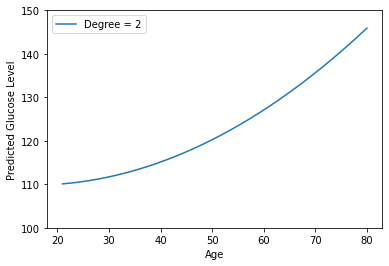

In [13]:
#Generate space in age category
x_space = np.linspace(21,80,100)

#Create a DataFrame for our prediction points
pred_df = pd.DataFrame({"Pregnancies": [means[0] for i in range(100)],
                        "BloodPressure": [means[2] for i in range(100)],
                        "SkinThickness": [means[3] for i in range(100)],
                        "Insulin": [means[4] for i in range(100)],
                        "BMI": [means[5] for i in range(100)],
                        "DiabetesPedigreeFunction": [means[6] for i in range(100)],
                        "Age" : x_space,
                        "Outcome": [means[8] for i in range(100)]})

pred_space = reg.predict(pred_df)

#Plot Line
plt.plot(x_space, pred_space, label="Degree = 2")

#Label axes
plt.xlabel("Age")
plt.ylabel("Predicted Glucose Level")
plt.ylim(100, 150)

plt.legend()

## Viewing Weights (Coefficients) 

We can still view the weights of our model, albeit in a more involved way because of the pipeline. However, due to the polynomial regression, it becomes more difficult to understand which weight corresponds to which feature. This can be done iteratively, with the following code, however.

In [14]:
#Extract weights and names from the model
weights = reg.steps[1][1].coef_
names = reg.steps[0][1].get_feature_names()

#Print out the feature names and corresponding weights
for i in range(len(weights)-1):
    
    #Find the corresponding weight
    weight = weights[i+1]
    name = names[i+1]
    
    print(f"Feature: {name}, Weight: {weight}")

#Print Intercept
intercept = reg.steps[1][1].intercept_
print(f"Intercept: {intercept}")

Feature: x0, Weight: -1.1251478340342358
Feature: x1, Weight: -0.2956838545465935
Feature: x2, Weight: -0.3288325336311151
Feature: x3, Weight: 0.2701809571658627
Feature: x4, Weight: 0.9934723495365727
Feature: x5, Weight: -42.35468558614904
Feature: x6, Weight: 1.0429615895731745
Feature: x7, Weight: 12.523729510271394
Feature: x0^2, Weight: -0.06871345560660418
Feature: x0 x1, Weight: 0.008503897532720994
Feature: x0 x2, Weight: -9.920351580417261e-05
Feature: x0 x3, Weight: -0.0045217232639874925
Feature: x0 x4, Weight: 0.025326628785087697
Feature: x0 x5, Weight: -0.032494745390785944
Feature: x0 x6, Weight: 0.016941828504340065
Feature: x0 x7, Weight: -0.09731941651365666
Feature: x1^2, Weight: 0.004692646578054917
Feature: x1 x2, Weight: 0.006424569326820701
Feature: x1 x3, Weight: -0.00190454783362365
Feature: x1 x4, Weight: 0.0008549535522616623
Feature: x1 x5, Weight: 0.3262564890679345
Feature: x1 x6, Weight: -0.0061049868717649265
Feature: x1 x7, Weight: -0.0977694986622954

The glucose level for any known $X_0$ through $X_7$ value can therefore be estimated. Remember from above that the first column in the DataFrame referred to the number of pregnancies, so this is variable $X_0$.

## Predictions

To make further use of the model, we can predict new dependent variable values. This can be done with any measured independent variable values.

Here, we choose mean values for each, and see what the prediction for this is. This prediction is 112.6, which is slightly different from the linear regression prediction of 121, and although the units are not given with the dataset, we can assume this to be a standard g/L.

In [15]:
means = np.mean(df.drop(["Glucose"], axis=1))

means

Pregnancies                  3.845052
BloodPressure               69.105469
SkinThickness               20.536458
Insulin                     79.799479
BMI                         31.992578
DiabetesPedigreeFunction     0.471876
Age                         33.240885
Outcome                      0.348958
dtype: float64

In [16]:
#Making an example prediction

#Our example point will be at the mean all dependent variables

#Predict y value - means is first changed to a numpy array and then reshaped to fit the function
predicted_y = reg.predict(np.array(means).reshape(1, -1))

predicted_y

array([112.63221035])

# References

[Dean](https://stats.stackexchange.com/users/115013/dean). (2021, February 15). *What is the difference between $R^2$ and variance score in Scikit-learn?*, [Version: 2021-02-15]. Cross Validated. https://stats.stackexchange.com/q/211556

Wu, S. (2020, May 18). Multicollinearity in regression. Medium. Retrieved February 25, 2022, from https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea 


**Dataset:**

Smith, J. W., Everhart, J. E., Dickson, W. C., Knowler, W. C., & Johannes, R. S. (1988, November). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In *Proceedings of the annual symposium on computer application in medical care* (p. 261). American Medical Informatics Association. [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/)

UCI Machine Learning. (2016, October 6). *Pima Indians Diabetes Database*. [Version 1]. Kaggle. [https://www.kaggle.com/uciml/pima-indians-diabetes-database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)